In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import tensorflow as tf
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
import keras.backend as K
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def load_dataset():
    train_dataset = h5py.File('C:/Users/Girish/Downloads/Jupyter notebooks/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('C:/Users/Girish/Downloads/Jupyter notebooks/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [4]:
def KerasModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    """
    X_input=Input(input_shape)
    X=ZeroPadding2D((3,3))(X_input)
    
    X=Conv2D(32,(5,5),strides=(2,2),name='conv0')(X)
    X=BatchNormalization(axis=3,name='bn0')(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((2,2),name='max_pool1')(X)
    
    X=Conv2D(64,(3,3),strides=(2,2),name='conv1')(X)
    X=BatchNormalization(axis=3,name='bn1')(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((2,2),name='max_pool2')(X)
    
    X=Conv2D(128,(1,1),strides=(1,1),name='conv2')(X)
    X=BatchNormalization(axis=3,name='bn2')(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((2,2),name='max_pool3')(X)
    
    
    X=Flatten()(X)
    
    X=Dense(6,activation='tanh')(X)
    X=Dense(12,activation='tanh')(X)
    
    X=Dense(1,activation='sigmoid')(X)
    
    model=Model(inputs=X_input ,outputs=X,name='KerasModel')
    
    return model
    

In [5]:
model=KerasModel(X_train.shape[1:])

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(X_train,Y_train,batch_size=40,epochs=15)

Epoch 1/15
600/600 [==============================] - 11s 19ms/step - loss: 0.6216 - accuracy: 0.7033
Epoch 2/15
600/600 [==============================] - 2s 4ms/step - loss: 0.4752 - accuracy: 0.8667
Epoch 3/15
600/600 [==============================] - 3s 4ms/step - loss: 0.3626 - accuracy: 0.9233
Epoch 4/15
600/600 [==============================] - 2s 4ms/step - loss: 0.2831 - accuracy: 0.9433
Epoch 5/15
600/600 [==============================] - 3s 4ms/step - loss: 0.2040 - accuracy: 0.9767: 1s - loss: 0.2240 - 
Epoch 6/15
600/600 [==============================] - 2s 4ms/step - loss: 0.1776 - accuracy: 0.9733
Epoch 7/15
600/600 [==============================] - 3s 4ms/step - loss: 0.1564 - accuracy: 0.9733
Epoch 8/15
600/600 [==============================] - 2s 4ms/step - loss: 0.1413 - accuracy: 0.9733
Epoch 9/15
600/600 [==============================] - 2s 4ms/step - loss: 0.1178 - accuracy: 0.9833
Epoch 10/15
600/600 [==============================] - 2s 4ms/step - loss: 0

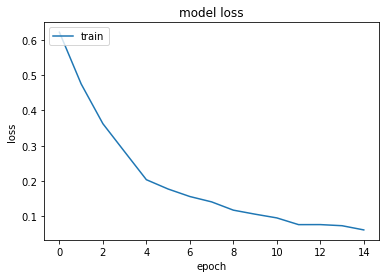

In [9]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

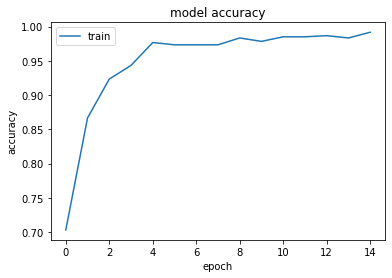

In [10]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')